# Assignment 1

### Student: Assem Kussainova
### ID: 201535798

In this assignment, we will go through basic linear algebra, image manipulation, and convolution using python. In many of the functions you will implement, you might need to look up helper functions which are available online.

In [1]:
from __future__ import print_function

#Setup

# The Random module might be used for pseudo-random number generators
import random 

# Numpy plays important role in scientific computing with Python, especially for coding vision algorithms. 
# This package will be one of our most used libraries in this class. Make sure you spend enough time for practicing it.
import numpy as np

# This module is used to measure the execution time of code sections  
from time import time

#This module is used to read and write image in various formats
from skimage import io

#Imports all the methods in each of the files: linear_algebra.py, image_manipulation.py, and convolution.py
from linear_algebra import *
from image_manipulation import *
from convolution import *

#Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Part 1: Linear Algebra Recap
Implement all the required functions in linear_algebra.py.

## Question 1.1 (0.5 point)
This question is to test whether you can define the following matrices and vectors using numpy. Look up `np.array()` for help. Then, define M as a (4,3) matrix, a as a (1,3) row vector, and b and c as (3,1) column vectors, respectively:
$$M = \begin{bmatrix}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8 \\
9 & 10 & 11 \end{bmatrix}
$$

$$a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

$$b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$ 

$$c = \begin{bmatrix}
2 \\ 2 \\ 0
\end{bmatrix}  
$$ 

In [2]:
#####################################
#       START YOUR CODE HERE        #
#####################################

M = np.array([[0, 1, 2], 
              [3, 4, 5],
              [6, 7, 8],
              [9, 10, 11]])

a = np.array([[1, 1, 0]])

b = np.array([[-1, 2, 5]])
b = b.transpose()

c = np.array([[2, 2, 0]])
c = c.transpose()
######################################
#        END OF YOUR CODE            #
######################################
## make sure when you check the size of M, a, b, c with the syntax array.shape, 
## they should return (4,3), (1,3), (3,1), and (3,1), respectively.
print("M = \n", M)
print("a = ", a)
print("b = \n", b)
print("c = \n", c)

M = 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
a =  [[1 1 0]]
b = 
 [[-1]
 [ 2]
 [ 5]]
c = 
 [[2]
 [2]
 [0]]


## Question 1.2 (0.25 point)
Implement **`dot_product`** function in **`linear_algebra.py`** and verify that it returns the correct answer for $b^Tc$.

In [3]:
# Now, let's test out this dot product. Your answer should be 2.
resDot = dot_product(b, c)
print (resDot)

2


## Question 1.3 (0.25 point)
Implement **`matrix_mult`** function in **`linear_algebra.py`** and use it to compute $(b^T c)Ma^T$

NOTE: **`matrix_mult`** function expects all inputs to be two dimensional numpy arrays, as opposed to 1-D arrays. This is an important distinction, because 2-D arrays can be transposed, while transpose has no effect on 1-D arrays. Look up `np.dot()` for help

To transpose a 2-D array, you can use the syntax array.T

In [4]:
# Your answer should be $[[2], [14], [26], [38]]$ of shape(4, 1).
resMult = matrix_mult(M, a, b, c)
print (resMult)
print()
print("The size is: ", resMult.shape)

[[ 2]
 [14]
 [26]
 [38]]

The size is:  (4, 1)


## Question 1.4 (0.5 point)
Implement **`svd`** and **`get_singular_values`** functions in **`linear_algebra.py`**. In this question, we perform singular value decomposition on the input matrix M and return the largest n singular values (n specified in the method calls below). Look up for linear algebra functions in `np.linalg` for help.

In [5]:
print(get_singular_values(M, 1))
print(get_singular_values(M, 2))

[22.44674882]
[22.44674882  1.4640585 ]


# Part 2: Image Manipulation 

In [6]:
image1_path = './Astana.jpg'
image2_path = './KhanShatyr.jpg'

## Question 2.1 (0.5 point)
Implement **`load`** function in **`image_manipulation.py`** and read `display` function below. 

In [7]:
def display(img):
    # Show image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

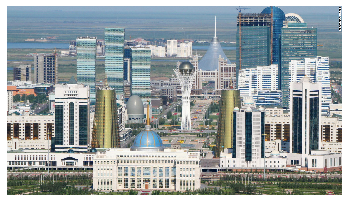

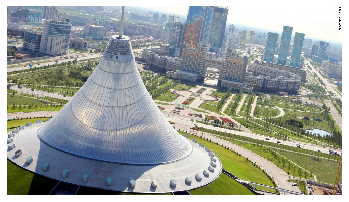

In [8]:
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

## Question 2.2 (0.5 point)
Implement **`change_value`** function in **`image_manipulation.py`** by converting images according to  $x_n = 0.5*x_p^2$ for every pixel, where $x_n$ is the new value and $x_p$ is the original value.

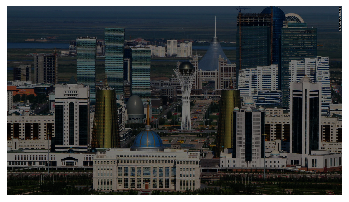

In [9]:
new_image = change_value(image1)
display(new_image)

## Question 2.3 (0.5 points)
Implement **`convert_to_grey_scale`** function in **`image_manipulation.py`** and convert the image into grey scale.

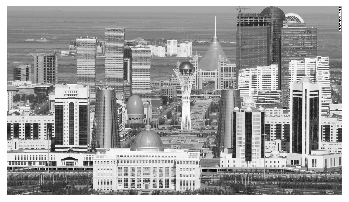

In [10]:
grey_image = convert_to_grey_scale(image1)
display(grey_image)

# Part 3: Convolution
In this part, you will implement two versions of convolution:
- `conv_naive`
- `conv_fast`

First, run the code cell below to load the image to work with.

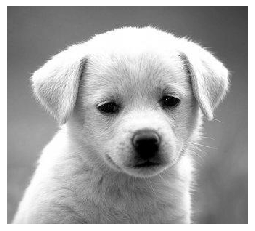

In [11]:
# Open image as grayscale
img = io.imread('dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

## Question 3.1 (1 point)
Now, implement the function **`conv_naive`** in **`convolution.py`**. This is a naive implementation of convolution which uses 4 nested for-loops. It takes an image $f$ and a kernel $h$ as inputs and outputs the convolved image $(f*h)$ that has the same shape as the input image. This implementation should take a few seconds to run.

We'll first test your **`conv_naive`** function on a simple input.

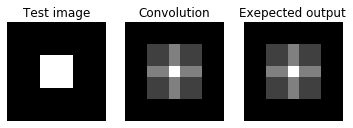

In [12]:
# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,1]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_naive function on the test image
test_output = conv_naive(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[4, 2:7] = 2
expected_output[2:7, 4] = 2
expected_output[4, 4] = 4

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

Now let's test your **`conv_naive`** function on a real image.

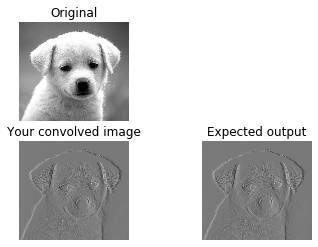

In [13]:
# Simple convolution kernel.
# Feel free to change the kernel and to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

out = conv_naive(img, kernel)

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Your convolved image')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convoluted_dog.jpg', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('Expected output')
plt.axis('off')


plt.show()

## Question 3.2 (2 points)
In the next task, we will implement a faster version of convolution using array operations in numpy. As shown in the lecture, a convolution can be performed by using a sliding window or a mask that computes sum of the pixel values weighted by the flipped kernel. The faster version will consist of three steps: i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute weighted sum of the neighborhood at each pixel.

First, implement the function **`zero_pad`** in **`convolution.py`**.

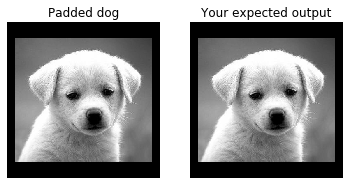

In [14]:
pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('Your expected output')
plt.axis('off')

plt.show()

Next, complete the function **`conv_fast`** in **`convolution.py`** using **`zero_pad`**. Run the code below to compare the outputs by the two implementations, i.e., `conv_fast` and `conv_naive`. Notably, **`conv_fast`** should run significantly faster than **`conv_naive`**.  
Depending on your implementation and computer, **`conv_naive`** should take a few seconds and **`conv_fast`** should be around 5 times faster.

conv_naive: took 5.091084 seconds.
conv_fast: took 2.766416 seconds.


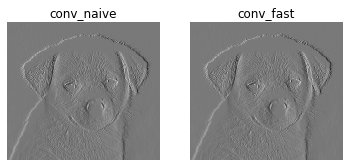

In [15]:
t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_naive = conv_naive(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_naive: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_naive output
plt.subplot(1,2,1)
plt.imshow(out_naive)
plt.title('conv_naive')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_naive) < 1e-10):
    print("Different outputs! Check your implementation.")